<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#О-проекте" data-toc-modified-id="О-проекте-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>О проекте</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Чтение-файла-данных" data-toc-modified-id="Чтение-файла-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Чтение файла данных</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных:" data-toc-modified-id="Исследовательский-анализ-данных:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных:</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверьте-гипотезы" data-toc-modified-id="Проверьте-гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверьте гипотезы</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Сборный проект

## О проекте

### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.<br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.<br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

### Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Чтение файла данных

In [1]:
#импорт библиотек для работы
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [2]:
# загрузка датасета
try:
    df = pd.read_csv('games.csv')
    df_raw = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
    df_raw = pd.read_csv('/datasets/games.csv')

In [3]:
#cнизим размерность чисел для вывода на экран на всем проекте
pd.options.display.float_format = '{:,.2f}'.format

## Подготовка данных

In [4]:
# рассмотрим содержаимое датасета
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#приведем названия столбцов к нижнему регистру
#df.rename(str.lower, axis='columns', inplace=True)
df.columns = df.columns.str.lower()

Год релиза в таблице находится в дробном формате, при этом данный формат для года не актуален, так как в таблице год - только целочислен. Аналогичная ситуцаия с пользовательским рейтингом. Поэтому данные столбцы приведем к целочисленному формату.<br>

In [7]:
df['year_of_release']= df['year_of_release'].astype('Int64', errors='ignore')
df['critic_score']=df['critic_score'].astype('Int64', errors='ignore')
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score          object
rating              object
dtype: object

Оценка пользователей представлена в формате `'object'`. Рассмотрим данные столбца и с чем это может быть связано.

In [8]:
#рассмотрим уникальные значения в столбце
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `'user_score'` имеется значение `tbd`, которое по сути своей является пропуском, поэтому заполним их пропусками, а столбец приведем к дробному формату.

In [9]:
df['user_score'] = pd.to_numeric(df['user_score'],errors = 'coerce')
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

In [10]:
df.dropna(subset=['year_of_release', 'genre', 'name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


In [11]:
#добавим столбце с сумарными продажами по всем регионал для последующего анализа
df['total_sales']= df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


### Вывод
- названия столбцов приведены к нижнему регистру.
- оценки критиков и года выпуска отформатированы к целочисленным значениям.
- оценки пользователей приведены к дробному формату, удалены ошибки.
- удалены пропуски данных.
- добавлен столбец с суммарными продажами.

## Исследовательский анализ данных:

In [12]:
#рассмотрим количество выпущенных игр по годам
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [13]:
#рассмотрим суммарную выручку от продажи игр по годам
df.groupby('year_of_release')['total_sales'].sum()

year_of_release
1980    11.38
1981    35.68
1982    28.88
1983    16.80
1984    50.35
1985    53.95
1986    37.08
1987    21.70
1988    47.21
1989    73.45
1990    49.37
1991    32.23
1992    76.16
1993    45.99
1994    79.23
1995    88.12
1996   199.15
1997   201.07
1998   256.31
1999   251.11
2000   201.66
2001   331.46
2002   394.97
2003   357.54
2004   418.68
2005   457.82
2006   517.71
2007   604.75
2008   671.50
2009   658.82
2010   590.13
2011   507.58
2012   355.84
2013   361.24
2014   331.53
2015   267.98
2016   129.94
Name: total_sales, dtype: float64

In [14]:
#рассмотрим отношение суммы продаж от количетсва игр
(df.groupby('year_of_release')['total_sales'].sum())/(df.groupby('year_of_release')['name'].count())

year_of_release
1980   1.26
1981   0.78
1982   0.80
1983   0.99
1984   3.60
1985   3.85
1986   1.77
1987   1.36
1988   3.15
1989   4.32
1990   3.09
1991   0.79
1992   1.77
1993   0.77
1994   0.65
1995   0.40
1996   0.76
1997   0.70
1998   0.68
1999   0.74
2000   0.58
2001   0.69
2002   0.48
2003   0.46
2004   0.55
2005   0.49
2006   0.51
2007   0.51
2008   0.47
2009   0.46
2010   0.47
2011   0.45
2012   0.54
2013   0.66
2014   0.57
2015   0.44
2016   0.26
dtype: float64

**Вывод**: В 80-е года игры были "штучным" товаром, выпуская как правило, не более 20 игр в год. Причиной этому было - малое количество платформ, не самое высокое визуальное качество и в целом общая недоступность игровых платформ.<br>
В начале 90-х, с выходом Sega Mega Drive и Super Nintendo ситуция стала улучшаться. Переломным можно назвать период 1993-1995 - это дважды удвоение количества выпущенных игр приуроченный в выходу приставок 5 поколения. Главным событием тут можно назвать выходы PlayStation 1 и Sega Saturn в 1994. <br> 
Для анализа. стоит использовать игры после 1994 года.

In [15]:
#рассмотрим количество выпущенных игр до 1994 года
df[df['year_of_release'] <1994]['name'].count()

365

Игр до 1994 всего 365, что составляет менее 2%.

Рассмотрим как менялись продажи по платформам.

In [16]:
df[df['year_of_release'] >= 1994].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2    1,233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64

Возьмем топ-7 платформ для анализа по годам, так как сюда вошел и абсолютный хит PS2, карманная консоль DS и консоль нового поколения PS4.

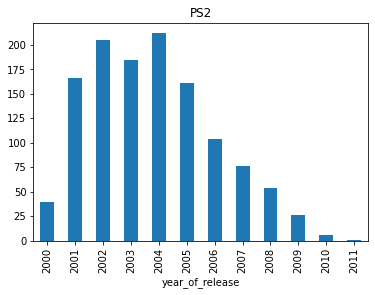

In [17]:
df[df['platform']=='PS2'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title='PS2');

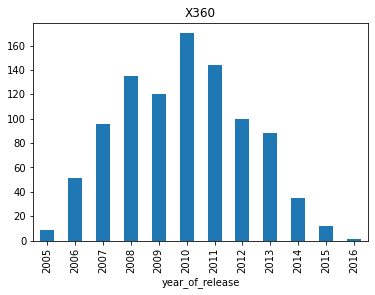

In [18]:
df[df['platform']=='X360'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title='X360');

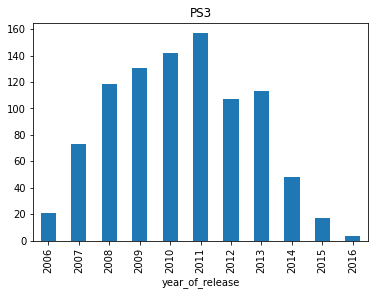

In [19]:
df[df['platform']=='PS3'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title='PS3');

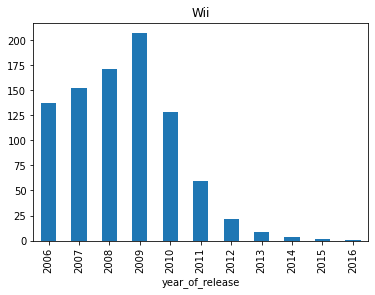

In [20]:
df[df['platform']=='Wii'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title='Wii');

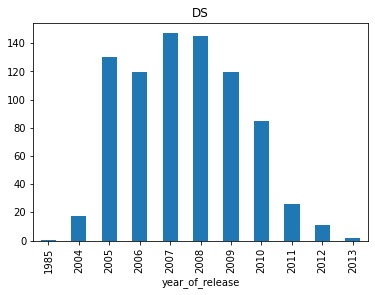

In [21]:
df[df['platform']=='DS'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title='DS');

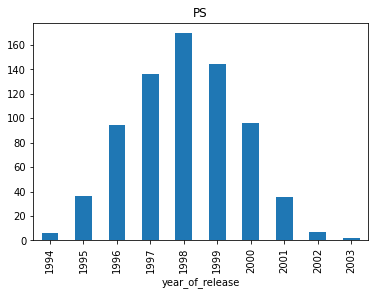

In [22]:
df[df['platform']=='PS'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title='PS');

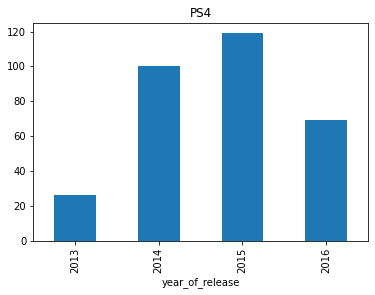

In [23]:
df[df['platform']=='PS4'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title='PS4');

**Вывод**: получилась интересная картина, несмотря на то, портативная консоль или стационарная, к какому поколению относится, средний срок жизни с более-менее приличными цифрами продаж: 6-8 лет, без учета года выхода консоли, т.к. в этот период еще слишком мала пользовательская база и уровень продаж скорее зависит от физических возможностей вендора обеспечить всех желающих консолями. Данные по PS4 скорре говорят о том, что данные не полные.

Находясь в 2016 и прогнозируя на 2017 год, есть смысл рассматривать консоли восьмого поколения, старт жизни которых начался в 2011 году. Для прогноза при этом можно использовать данные предыдущего поколения. Рассмотрим графики по данным платформам: XOne, PS4, WiiU, 3DS, PSV. Для исследования актуальных трендов, ограничим период исследования 2013 годом.

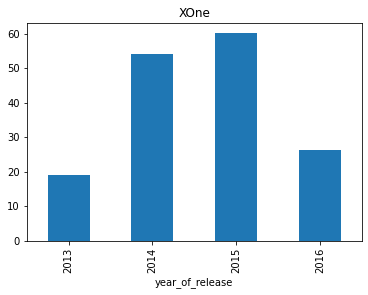

In [24]:
df[df['platform']=='XOne'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title='XOne');

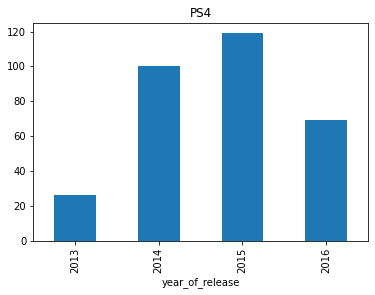

In [25]:
df[df['platform']=='PS4'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title='PS4');

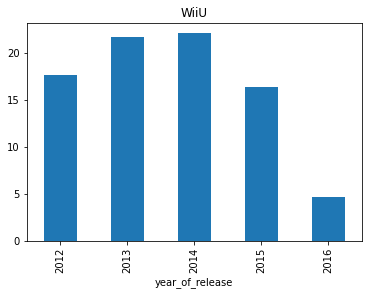

In [26]:
df[df['platform']=='WiiU'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title='WiiU');

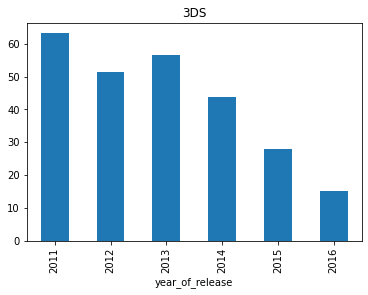

In [27]:
df[df['platform']=='3DS'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title='3DS');

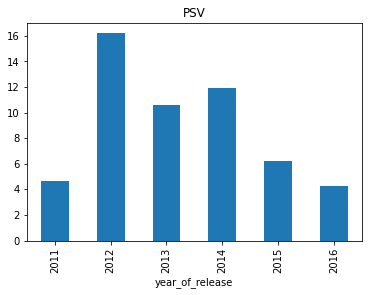

In [28]:
df[df['platform']=='PSV'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title='PSV');

Судя по графикам, наибольший рост ожидает XOne и PS4. Остальные, судя по всему, уже прошли свой пик. И безусловным лидером здесь является PS4, следующий конкурент имеет продажи в 2 раза ниже, но все же это очень значимые суммы.

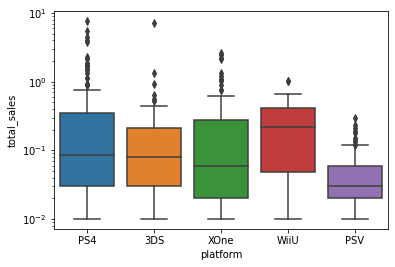

In [29]:
#построим боксплоты продаж на данных платформах
sns.boxplot(x="platform", y="total_sales", data=df[(df['year_of_release'] == 2016)
            &(df['platform'].isin(['XOne', 'PS4', 'WiiU', '3DS', 'PSV']))]).set_yscale("log")
plt.show()

**Вывод**: Основной объем выручки для игр лежит в диапазоне 20-300 тысяч копий, с медианой в районе 100 тысяч копий. PSV как портативная консоль показывает себя не с лучшей стороны. PS4 и Xone, несмотря на то, что только выходят на пик своих продаж, уже показывают хорошие цифры, однако WiiU в среднем дает лучший результат, разрбос по продажам у нее очень небольшой, поэтому нельзя так просто бросать эту платформу.

Рассмотрим зависимость уровня продаж от оценки пользователей и критиков на примере самой популярной платформы предыдущего поколения - X360, а так же хитмэп по корреляции данных.

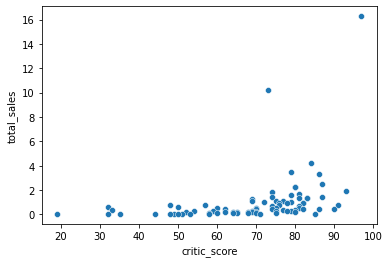

In [30]:
sns.scatterplot(x='critic_score', y='total_sales', 
                data=df[(df['platform']=='X360')&(df['year_of_release'] >= 2013)], ci=None);

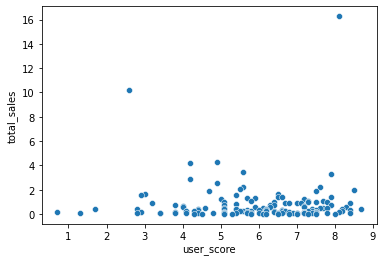

In [31]:
sns.scatterplot(x='user_score', y='total_sales', 
                data=df[(df['platform']=='X360')&(df['year_of_release'] >= 2013)], ci=None);

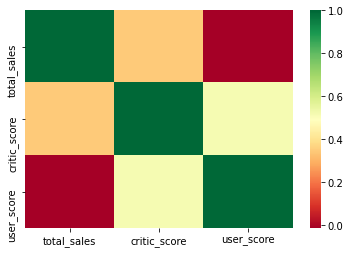

In [32]:
sns.heatmap(df[(df['platform']=='X360')&(df['year_of_release'] >= 2013)]
            [['total_sales', 'critic_score','user_score']].corr(),cmap='RdYlGn');

**Вывод**: наибольшее влияние оказывает оценка критиков, хотя корреляция даже по ним слабо выражена, которая, скорее всего и побуждает к покупке пользователей, которые затем так же оценивают игру. Об этом говорит и корреляция оценок пользователей и критиков.

Проделаем аналогичное упражнение для актуальных платформ.

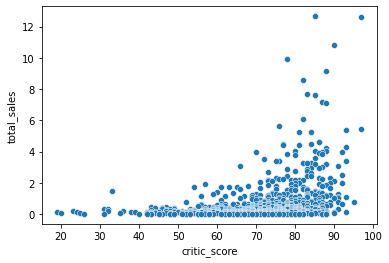

In [33]:
sns.scatterplot(x='critic_score', y='total_sales', data=df[df['platform']
                .isin(['XOne', 'PS4', 'WiiU', '3DS', 'PSV'])], ci=None);

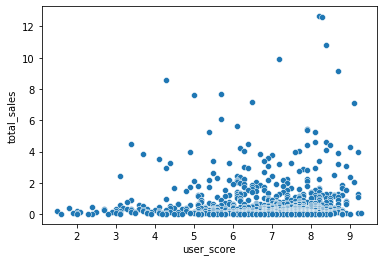

In [34]:
sns.scatterplot(x='user_score', y='total_sales', data=df[df['platform']
                .isin(['XOne', 'PS4', 'WiiU', '3DS', 'PSV'])], ci=None);

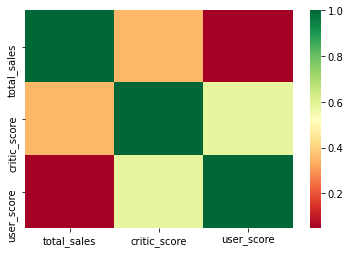

In [35]:
sns.heatmap(df[df['platform'].isin(['XOne', 'PS4', 'WiiU', '3DS', 'PSV'])]
            [['total_sales', 'critic_score','user_score']].corr(),cmap='RdYlGn');

**Вывод**: картинка максимально близка к графикам X360, значит наша теория была верна

Рассмотрим так же статистику продаж по жанрам.

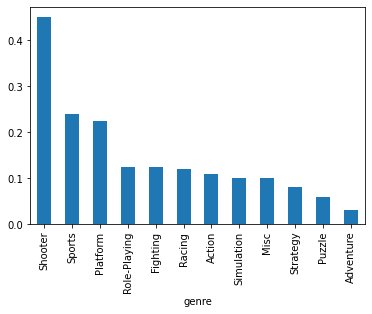

In [36]:
(
    df[df['year_of_release'] >= 2013].groupby('genre')['total_sales']
    .median().sort_values(ascending=False).plot(kind='bar')
);

**Вывод**: К наиболее популярным жанрам относятся шутеры, спортивные симуляторы и платформеры - игры наиболее динамичные и дарящие, наверно, наиболее сконцентрированные эмоции на еденицу времени. С другой же стороны нас встречают пазлы и приключения, которые, по сути, являются антиподами для популярных жанров.

### Вывод
- анализируя продажи по годам, кажется, что в 80-е года игры были "штучным" товаром, выпуская как правило, не более 20 игр в год. Причиной этому было - малое количество платформ, не самое высокое визуальное качество и в целом общая недоступность игровых платформ. В начале 90-х, с выходом Sega Mega Drive и Super Nintendo ситуция стала улучшаться. Переломным можно назвать период 1993-1995 - это дважды удвоение количества выпущенных игр приуроченный в выходу приставок 5 поколения.
- график распределения продаж дал интересную картину, несмотря на то, портативная консоль или стационарная, к какому поколению относится, средний срок жизни с более-менее приличными цифрами продаж: 6-8 лет, без учета года выхода консоли, т.к. в этот период еще слишком мала пользовательская база и уровень продаж скорее зависит от физических возможностей вендора обеспечить всех желающих консолями.
- наибольшее влияние на продажи оказывает оценка критиков, которая, скорее всего и побуждает к покупке пользователей, которые затем так же оценивают игру. Об этом говорит и корреляция оценок пользователей и критиков.\
- к наиболее популярным жанрам относятся экшн, спортивные симуляторы и шутеры - игры наиболее динамичные и дарящие, наверно, наиболее сконцентрированные эмоции на еденицу времени. С другой же стороны нас встречают пазлы и стратегии, которые, по сути, являются антиподами для популярных жанров.

## Портрет пользователя каждого региона

Построим топ-5 платформ по регионам продаж.

In [37]:
(df[df['year_of_release'] >= 2013].groupby('platform')['na_sales']
 .sum()/df['na_sales'].sum()).sort_values(ascending=False).head()*100

platform
PS4    2.50
XOne   2.14
X360   1.88
PS3    1.46
3DS    0.88
Name: na_sales, dtype: float64

In [38]:
(df[df['year_of_release'] >= 2013].groupby('platform')['eu_sales']
 .sum()/df['eu_sales'].sum()).sort_values(ascending=False).head()*100

platform
PS4    5.88
PS3    2.83
XOne   2.15
X360   1.77
3DS    1.29
Name: eu_sales, dtype: float64

In [39]:
(df[df['year_of_release'] >= 2013].groupby('platform')['jp_sales']
 .sum()/df['jp_sales'].sum()).sort_values(ascending=False).head()*100

platform
3DS    5.25
PS3    1.81
PSV    1.44
PS4    1.24
WiiU   0.84
Name: jp_sales, dtype: float64

**Вывод**: Лидером продаж в Северной Америка является PS4, следом догоняют консоли от Microsoft, в Японии в топе только японские Нинтендо и Сони. Однако, в целом предпочтения в Европе и Америка совпадают между собой, с единственным небольшим перекосом XBox в Америке.

Построим топ-5 жанров по регионам продаж.

In [40]:
(df[df['year_of_release'] >= 2013].groupby('genre')['na_sales']
 .sum()/df['na_sales'].sum()).sort_values(ascending=False).head()*100

genre
Action         2.90
Shooter        2.53
Sports         1.50
Role-Playing   1.07
Misc           0.63
Name: na_sales, dtype: float64

In [41]:
(df[df['year_of_release'] >= 2013].groupby('genre')['eu_sales']
 .sum()/df['eu_sales'].sum()).sort_values(ascending=False).head()*100

genre
Action         4.92
Shooter        3.66
Sports         2.52
Role-Playing   1.54
Racing         0.84
Name: eu_sales, dtype: float64

In [42]:
(df[df['year_of_release'] >= 2013].groupby('genre')['jp_sales']
 .sum()/df['jp_sales'].sum()).sort_values(ascending=False).head()*100

genre
Role-Playing   3.95
Action         3.14
Misc           0.71
Fighting       0.59
Shooter        0.51
Name: jp_sales, dtype: float64

**Вывод**: ТОП-продаж в Европе и Северной Америке совпадает с общими трендами, однако в Японии на первое место выходят ролевые игры, так же в топ ворвались платформеры. Думаю, что эта особенность связанна с популярностью таких платформ как Нинтендо, где основные продажи на себя забирают и являются флагманами консолей такие игры как Зельда (ролевая), Марио (платформер) и другие.

In [43]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рассмотрим влияние рейтинга на продажи. Чтобы не терять почти 7млн. продаж игр без рейтинга, сделаем отдельную таблицу.

In [44]:
df_rating=df
df_rating['rating']=df['rating'].fillna('None')
df_rating.pivot_table(index='rating', 
                      values=['na_sales','eu_sales', 'jp_sales', 'total_sales'], aggfunc='sum').reset_index()

,rating,eu_sales,jp_sales,na_sales,total_sales
0,AO,0.61,0.00,1.26,1.96
1,E,703.87,197.96,"1,274.24","2,407.61"
2,E10+,183.35,40.20,345.50,640.98
3,EC,0.11,0.00,1.53,1.75
4,K-A,0.27,1.46,2.56,4.32
5,M,480.00,63.58,742.89,"1,462.53"
6,None,609.65,836.74,"1,225.84","2,822.10"
7,RP,0.03,0.00,0.00,0.04
8,T,421.79,150.70,747.60,"1,473.08"


**Вывод**: Безусловным победителем этой гонки являются игры с рейтингом E, игры для всех, т.к. у них самая широкая аудитория, а так же игры без рейтинга, по этому пункту сложнее давать комментарии, поскольку в современных реалиях игру без маркировки на большой рынок не выпустить (исключение Япония - возможно локальные игры не проходят стандартную маркировку, отсюда такие продажи). Игры для взрослых и подростков в абсолюте практически равны, и в сумме примерно соотвествуют играм с рейтингом E. Поэтому таргетироваться необходимо в эти 3 группы. Это по факту должно решаться на стадии идеи, ведь суровый хоррор о выживании вряд ли получится сделать семейным.

### Вывод
-  если говорить о платформах, то лидером продаж в Северной Америка является сделанный там же XBox, в Японии в топе только японские Нинтендо и Сони. Однако, в целом предпочтения в Европе и Америка совпадают между собой, единственным перекосом XBox в Америке.
- что касается жанров, то ТОП-продаж в Европе и Северной Америке совпадает с общими трендами, однако в Японии на первое место выходят ролевые игры, так же в топ ворвались платформеры. Думаю, что эта особенность связанна с популярностью таких платформ как Нинтендо, где основные продажи на себя забирают и являются флагманами консолей такие игры как Зельда (ролевая), Марио (платформер) и другие.
- по рейтингам безусловным победителем являются игры с рейтингом E, игры для всех, т.к. у них самая широкая аудитория. Игры для взрослых и подростков в абсолюте практически равны, и в сумме примерно соотвествуют играм с рейтингом E. Поэтому таргетироваться необходимо в эти 3 группы. Это по факту должно решаться на стадии идеи, ведь суровый хоррор о выживании вряд ли получится сделать семейным.

## Проверьте гипотезы

Проверим гипотезу о равенстве пользовательских рейтингов платформ XBox One и PC. Нулевой гипотезой будет - равенство рейтингов платформ. Альетарнативная гипотеза - рейтинги платформ различаются. В связи с тем, что платформа PC имеет гораздо более богатую историю чем XOne, выборки будут отличаться периодом, возьмет критерий 10%.

In [45]:
alpha = .1 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df[(df['platform']=='XOne')&(df['user_score'] > 0)&(df['year_of_release'] >= 2013)]['user_score'], 
    df[(df['platform']=='PC')&(df['user_score'] > 0)&(df['year_of_release'] >= 2013)]['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

#выведем на экран средние
pxumean=df[(df['platform']=='XOne')&(df['user_score'] > 0)&(df['year_of_release'] >= 2013)]['user_score'].mean()
print(f'Среднее оценка платформы Xbox One = {pxumean:.2f}')
ppumean=df[(df['platform']=='PC')&(df['user_score'] > 0)&(df['year_of_release'] >= 2013)]['user_score'].mean()
print(f'Среднее оценка платформы PC = {ppumean:.2f}')

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу
Среднее оценка платформы Xbox One = 6.52
Среднее оценка платформы PC = 6.27


Нулевая гипотеза не отвергнута, пользовательские жанры не равны.

Проверим гипотезу о том, что средние жанров Action и Sports разные. Нулевой гипотезой будет - равенство рейтингов жанров. Альтернативной гипотезой, что рейтинги жанров различаются. Популярность жанров и период оценки схожи, возьмем "стандартный" критерий в 5%.

In [46]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df[(df['genre']=='Action')&(df['user_score'] > 0)&(df['year_of_release'] >= 2013)]['user_score'], 
    df[(df['genre']=='Sports')&(df['user_score'] > 0)&(df['year_of_release'] >= 2013)]['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
#выведем на экран средние
gaumean=df[(df['genre']=='Action')&(df['user_score'] > 0)&(df['year_of_release'] >= 2013)]['user_score'].mean()
print(f'Среднее оценка жанра Action = {gaumean:.2f}')
gsumean=df[(df['genre']=='Sports')&(df['user_score'] > 0)&(df['year_of_release'] >= 2013)]['user_score'].mean()
print(f'Среднее оценка жанра Sports = {gsumean:.2f}')

p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу
Среднее оценка жанра Action = 6.84
Среднее оценка жанра Sports = 5.24


Нулевая гипотеза отвергнута, значит средние оценки пользователей двух жанров отличаются.

### Вывод
- средние пользовательские оценки пользоватлей XBox One и PC не отличаются, это и не удивительно, взаимная интеграция XBox и PC  дает свои плоды.
- средние пользовательские оценки жанров Action и Sports отличаются, все таки ежегодные обновления карточек в спортивных симуляторах людям меньше по душе.

## Общий вывод

- получен датасет с информацией по продажам игр по регионам, оценкам пользователей и критиков, рейтинги игр. Проведена работа по форматированию таблицы и удалению пропусков. Добавлен столбец с суммарными продажами.
- анализируя продажи по годам, кажется, что в 80-е года игры были "штучным" товаром, выпуская как правило, не более 20 игр в год. Причиной этому было - малое количество платформ, не самое высокое визуальное качество и в целом общая недоступность игровых платформ. В начале 90-х, с выходом Sega Mega Drive и Super Nintendo ситуция стала улучшаться. Переломным можно назвать период 1993-1995 - это дважды удвоение количества выпущенных игр приуроченный в выходу приставок 5 поколения.
- график распределения продаж дал интересную картину, несмотря на то, портативная консоль или стационарная, к какому поколению относится, средний срок жизни с более-менее приличными цифрами продаж: 6-8 лет, без учета года выхода консоли, т.к. в этот период еще слишком мала пользовательская база и уровень продаж скорее зависит от физических возможностей вендора обеспечить всех желающих консолями.
- наибольшее влияние оказывает оценка критиков, хотя корреляция даже по ним слабо выражена, которая, скорее всего и побуждает к покупке пользователей, которые затем так же оценивают игру. Об этом говорит и корреляция оценок пользователей и критиков.
- к наиболее популярным жанрам относятся шутеры, спортивные симуляторы и платформеры - игры наиболее динамичные и дарящие, наверно, наиболее сконцентрированные эмоции на еденицу времени. С другой же стороны нас встречают пазлы и приключения, которые, по сути, являются антиподами для популярных жанров.
-  если говорить о платформах, то лидером продаж в Северной Америка является PS4, следом догоняют консоли от Microsoft, в Японии в топе только японские Нинтендо и Сони. Однако, в целом предпочтения в Европе и Америка совпадают между собой, с единственным небольшим перекосом XBox в Америке.
- что касается жанров, то ТОП-продаж в Европе и Северной Америке совпадает с общими трендами, однако в Японии на первое место выходят ролевые игры, так же в топ ворвались платформеры. Думаю, что эта особенность связанна с популярностью таких платформ как Нинтендо, где основные продажи на себя забирают и являются флагманами консолей такие игры как Зельда (ролевая), Марио (платформер) и другие.
- по рейтингам безусловным победителем этой гонки являются игры с рейтингом E, игры для всех, т.к. у них самая широкая аудитория, а так же игры без рейтинга, по этому пункту сложнее давать комментарии, поскольку в современных реалиях игру без маркировки на большой рынок не выпустить (исключение Япония - возможно локальные игры не проходят стандартную маркировку, отсюда такие продажи). Игры для взрослых и подростков в абсолюте практически равны, и в сумме примерно соотвествуют играм с рейтингом E. Поэтому таргетироваться необходимо в эти 3 группы. Это по факту должно решаться на стадии идеи, ведь суровый хоррор о выживании вряд ли получится сделать семейным.
- средние пользовательские оценки пользоватлей XBox One и PC не отличаются, это и не удивительно, взаимная интеграция XBox и PC  дает свои плоды.
- средние пользовательские оценки жанров Action и Sports отличаются, все таки ежегодные обновления карточек в спортивных симуляторах людям меньше по душе.